In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Fetch Data 

In [4]:
df =  pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/k_circle_sales.csv')
print(df.shape)
df.head()

(8523, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


# Describe

In [18]:
df.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.0,8523.0,8523.0,8523.0,8523.0,8523.0
mean,12.0,0.0,141.0,1998.0,2181.0,13.0
std,6.0,0.0,62.0,8.0,1706.0,2.0
min,0.0,0.0,31.0,1985.0,33.0,0.0
25%,8.0,0.0,94.0,1987.0,834.0,13.0
50%,12.0,0.0,143.0,1999.0,1794.0,14.0
75%,16.0,0.0,186.0,2004.0,3101.0,14.0
max,21.0,0.0,267.0,2009.0,13087.0,24.0


75% of the items have weights greater than 8

In [7]:
df.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,6473,8523
unique,1559,5,16,10,3,8,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
freq,10,5089,1232,935,2793,2793,5577


# Missing Data Percentage

In [9]:
df.isna().sum()/df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

# Box Plot

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

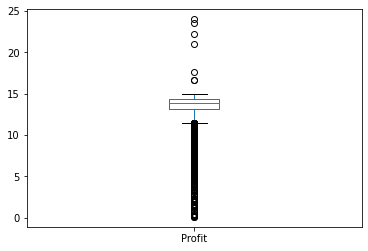

In [10]:
df['Profit'].plot.box()

<AxesSubplot:>

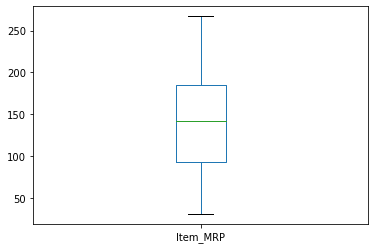

In [21]:
df['Item_MRP'].plot.box()

# Separate Numerical & Categorical Data

In [7]:
num_data = df.select_dtypes(include=['float64'])
num_data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,9.300,0.016047,249.8,3735.1380,11.5
1,5.920,0.019278,48.3,443.4228,14.3
2,17.500,0.016760,141.6,2097.2700,14.5
3,19.200,0.000000,182.1,732.3800,13.6
4,8.930,0.000000,53.9,994.7052,14.1
...,...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834,14.1
8519,8.380,0.046982,108.2,549.2850,14.2
8520,10.600,0.035186,85.1,1193.1136,9.5
8521,7.210,0.145221,103.1,1845.5976,14.2


In [5]:
cat_data = df.select_dtypes(include=['object','int64'])
cat_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 2,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 2,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,NaN,NaN,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,2002,NaN,NaN,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,2004,Small,Tier1,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,2009,Medium,Tier 2,Supermarket Type2


# Outlier Analysis

In [79]:
# Compute 1st quartile and 3rd quartile
def find_outlier_pct(df, res_df):
    out_pct = []
    iqr_mean = []
    trim_mean = []
    q10 = []
    q25 =[]
    q75 = []
    q90 = []
    out_cnt = []
    out_data_dt = {}
    for col in df:
        sr = df[col].quantile([.25,.75])
        q1 = sr.iloc[0]
        q3 = sr.iloc[1]

        # Compute the iqr, lower whisker and upper whisker
        iqr = q3 - q1
        lw = q1 - 1.5 * iqr
        uw = q3 + 1.5 * iqr
        
        # identify the percentage of outliers in each numerical column
        out_data = df[(df[col]>uw)|(df[col]<lw)]
        out_cnt.append(out_data.shape[0])
        out_pct.append(out_data.shape[0]/df.shape[0]*100)
        iqr_mean.append(df.loc[(df[col]<=uw)|(df[col]>=lw),col].mean())
        trim_mean.append(st.trim_mean(df[col], 0.1))
        q10.append(df[col].quantile(0.1))
        q25.append(df[col].quantile(0.25))
        q75.append(df[col].quantile(0.75))
        q90.append(df[col].quantile(0.9))
        out_data_dt[col] = out_data
    
    res_df['IQR Outlier Count'] = out_cnt
    res_df['IQR Outlier Pct'] = out_pct
    res_df['IQR Mean'] = iqr_mean
    res_df['Trim Mean'] = trim_mean
    res_df['0.1'] = q10
    res_df['0.25'] = q25
    res_df['0.75'] = q75
    res_df['0.9'] = q90
    return res_df, out_data_dt

res_df = pd.concat([num_data.mean(), num_data.median()], axis=1)
res_df.columns=['Mean','Median']
res_df,out_data_dt = find_outlier_pct(num_data, res_df)
res_df.round(2)

,Mean,Median,IQR Outlier Count,IQR Outlier Pct,IQR Mean,Trim Mean,0.1,0.25,0.75,0.9
Item_Weight,11.68,11.80,0,0.00,11.68,12.89,5.11,7.72,16.50,19.25
Item_Visibility,0.07,0.05,144,1.69,0.07,0.06,0.01,0.03,0.09,0.14
Item_MRP,141.00,142.70,0,0.00,141.00,139.71,52.80,93.80,185.65,231.20
Item_Outlet_Sales,2181.29,1794.33,186,2.18,2181.29,1971.33,343.55,834.25,3101.30,4570.05
Profit,13.41,13.90,705,8.27,13.41,13.74,11.80,13.15,14.30,14.60


In [80]:
# outlier data for the Item Outlet Sales Column
out_data_dt['Item_Outlet_Sales']

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
43,21.35,0.069103,259.9,6768.5228,12.4
130,0.00,0.033810,180.6,7968.2944,14.7
132,0.00,0.144338,224.4,6976.2524,14.3
145,18.60,0.039356,246.4,7370.4060,12.8
203,NaN,0.078362,177.9,6704.6060,13.8
...,...,...,...,...,...
8245,16.20,0.035967,260.3,7549.5062,13.6
8329,0.00,0.041622,253.6,6630.0364,14.6
8350,10.00,0.021421,248.4,7240.5750,13.5
8447,20.35,0.089975,261.7,7588.1226,14.4


# Univariate Analysis in Categorical Data

1. Unique
2. Nunique
3. Value Counts
4. Mode

# Univariate Analysis in Numerical Data

Measures of Central Tendency
1. Mean
2. Median
3. Mode

Measures of Dispersion
1. Range
2. Standard Deviation
3. Variance
4. Coefficient of Variation
5. IQR

In [6]:
df.mean()

Item_Weight                    11.676740
Item_Visibility                 0.066132
Item_MRP                      140.998838
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Profit                         13.414514
dtype: float64

In [73]:
# formula for standard deviation
np.sqrt(np.mean(pow(num_data['Item_Outlet_Sales'] - num_data['Item_Outlet_Sales'].mean(),2)))

1706.3995013565946

In [71]:
# std deviation
num_data.std()

Item_Weight             5.776851
Item_Visibility         0.051598
Item_MRP               62.258099
Item_Outlet_Sales    1706.499616
Profit                  1.701840
dtype: float64

The Item Weight Average is 11, with a standard deviation of 5.7

**Drawbacks of Standard Deviation**

Cannot compare the standard deviation of 2 features, we use coefficient of variance for it

In [98]:
# variance
num_data.var().round(2)

Item_Weight               33.37
Item_Visibility            0.00
Item_MRP                3876.07
Item_Outlet_Sales    2912140.94
Profit                     2.90
dtype: float64

In [74]:
# coefficent of variation
cv = num_data.std()/num_data.mean()
cv

Item_Weight          0.494732
Item_Visibility      0.780224
Item_MRP             0.441550
Item_Outlet_Sales    0.782335
Profit               0.126866
dtype: float64

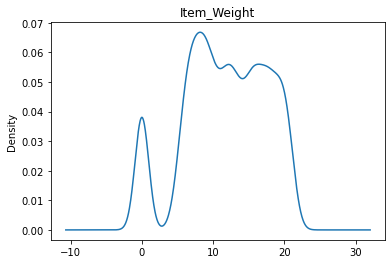

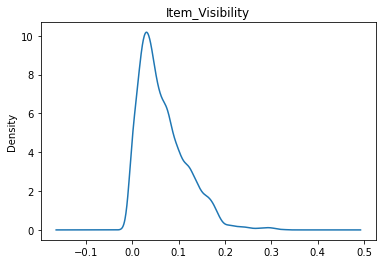

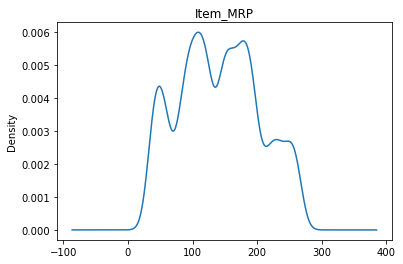

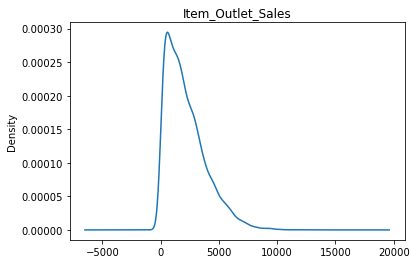

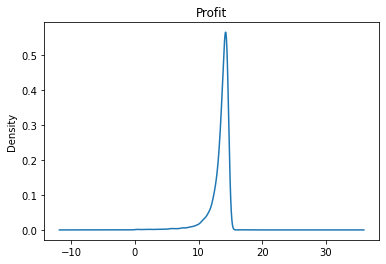

In [128]:
# kde
for col in num_data:
    num_data[col].plot(kind='kde')
    plt.title(col)
    plt.show()

# Univariate Analysis in Categorical Data

In [85]:
cat_data.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            8
Outlet_Type                     4
dtype: int64

# Bar Plot 

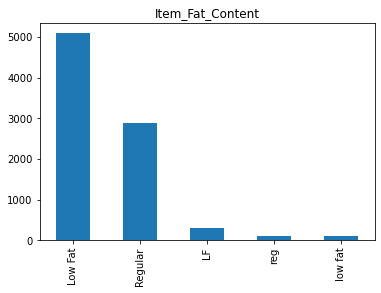

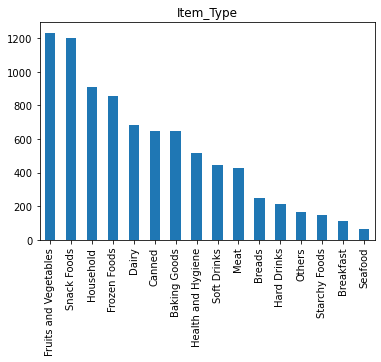

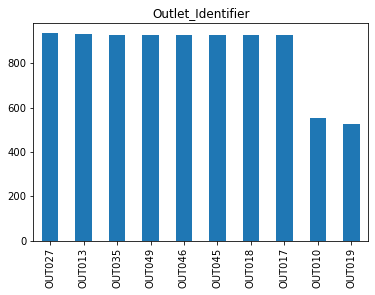

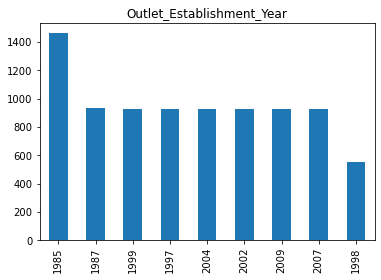

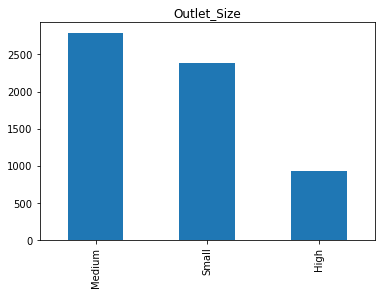

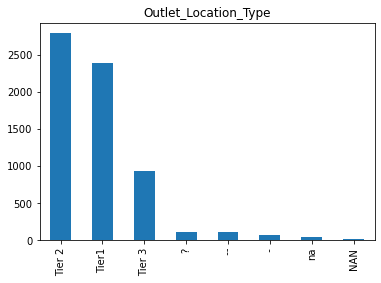

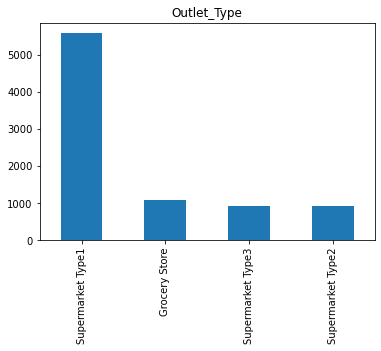

In [94]:
for col in cat_data:
    if col !='Item_Identifier':
        cat_data[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()

# Bivariate Analysis in Numerical Data

# Covariance

In [96]:
num_data.cov().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,33.37,-0.02,7.43,-329.57,-0.16
Item_Visibility,-0.02,0.00,-0.01,-11.33,0.00
Item_MRP,7.43,-0.01,3876.07,60299.01,0.44
Item_Outlet_Sales,-329.57,-11.33,60299.01,2912140.94,2.76
Profit,-0.16,0.00,0.44,2.76,2.90


## Correlation

In [9]:
num_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.055081,0.020616,-0.034997,-0.016058
Item_Visibility,-0.055081,1.000000,-0.001597,-0.128625,0.014269
Item_MRP,0.020616,-0.001597,1.000000,0.567555,0.004109
Item_Outlet_Sales,-0.034997,-0.128625,0.567555,1.000000,0.000951
Profit,-0.016058,0.014269,0.004109,0.000951,1.000000


<AxesSubplot:>

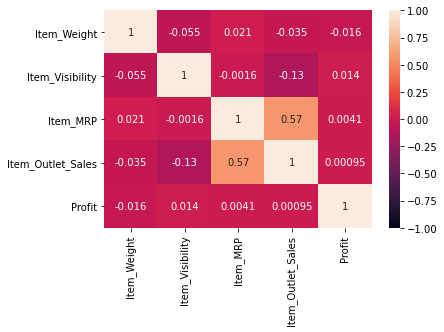

In [105]:
# default method is pearson, other method available is spearman
sns.heatmap(num_data.corr(),annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

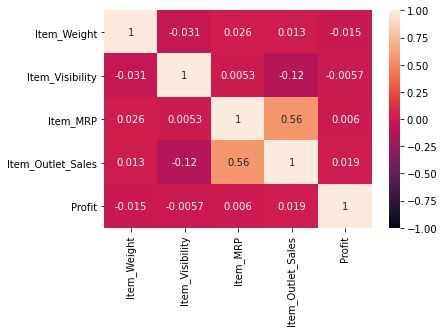

In [106]:
sns.heatmap(num_data.corr(method='spearman'), annot=True, vmin=-1, vmax=1)

# Bivariate Analysis Between Numerical & Categorical Data 

## Using Group By

In [110]:
df.groupby('Outlet_Size').agg(Item_Outlet_Sales_Mean=('Item_Outlet_Sales', 'mean'))
# there is significant difference between item outlet sales mean for each Outlet Size 

,Item_Outlet_Sales_Mean
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1912.149161


## Using Box Plot 

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

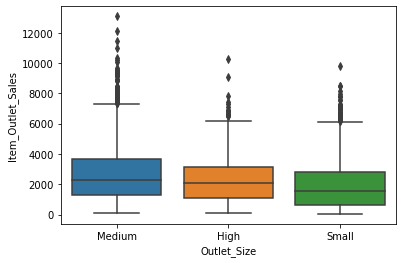

In [114]:
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Profit'>

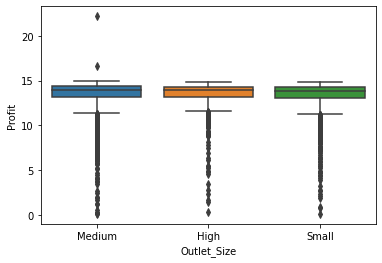

In [122]:
sns.boxplot(data=df,x='Outlet_Size', y='Profit')

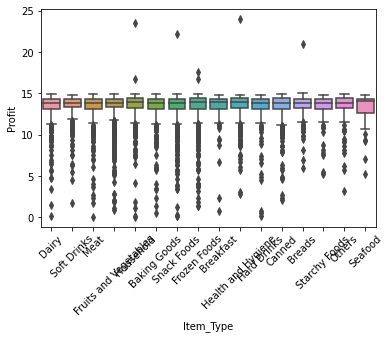

In [124]:
sns.boxplot(data=df,x='Item_Type', y='Profit')
plt.xticks(rotation=45)
plt.show()

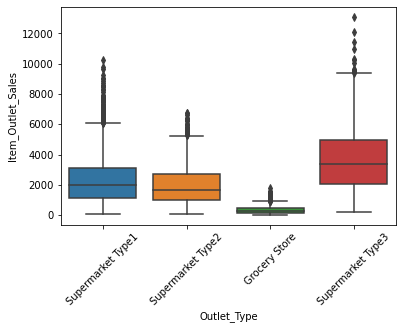

In [121]:
sns.boxplot(data=df,x='Outlet_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.show()

Item Outlet Sales is low for Grocery store and high for Supermarket Type3

Supermarket Type 1 & 2 have almost similar Item Outlet Sales

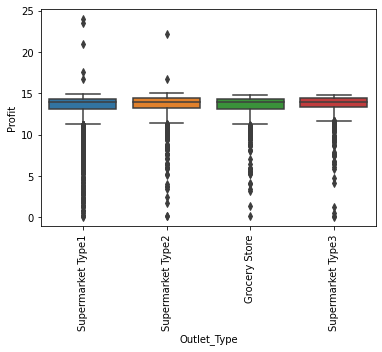

In [120]:
sns.boxplot(data=df,x='Outlet_Type', y='Profit')
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis between 2 Categorical Variables 

In [7]:
cat_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
cat_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)
cat_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [8]:
cat_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [15]:
cat_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
tab=pd.crosstab(cat_data['Item_Type'],cat_data['Item_Fat_Content'])/cat_data['Item_Fat_Content'].value_counts()*100
tab

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,5.963386,10.612109
Breads,2.537611,3.692615
Breakfast,0.743158,2.295409
Canned,6.180895,10.246174
Dairy,7.576581,8.782435
Frozen Foods,8.156607,13.506321
Fruits and Vegetables,11.419250,20.026613
Hard Drinks,3.878920,0.000000
Health and Hygiene,9.425412,0.000000


<AxesSubplot:xlabel='Item_Type'>

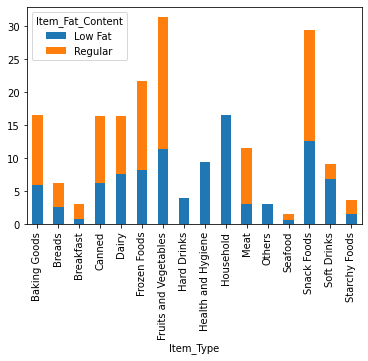

In [20]:
# Grouped Bar Chart
tab.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item_Fat_Content'>

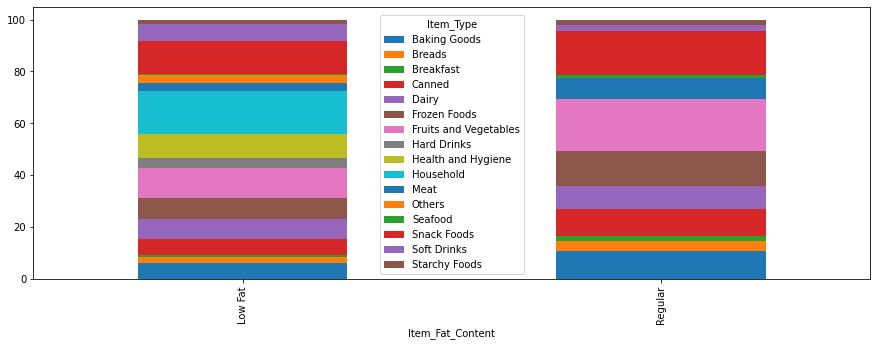

In [22]:
(tab.T).plot(kind='bar', stacked=True, figsize=(15,5))

# Multivariate Analysis

1. Groupby / Pivot
2. Box plot with hue
3. Scatter Plot with hue

In [26]:
# Pivot: relating 3 variables - 2 categorical and 1 numerical column
# recommendation systems - user item matrix, user movie rating matrix
df.pivot_table(index='Item_Type', columns='Outlet_Size', values='Item_Outlet_Sales', aggfunc='mean')

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,2050.901134,2386.702771,1724.681911
Breads,2080.731528,2718.244814,2158.795546
Breakfast,2104.286508,2865.085356,1715.988533
Canned,2211.265203,2562.075105,2038.457667
Dairy,2453.181713,2725.360676,1900.495836
Frozen Foods,2214.096189,2612.229851,1895.489818
Fruits and Vegetables,2405.118103,2844.100923,1931.258454
Hard Drinks,2363.590000,2551.079280,1926.518932
Health and Hygiene,1953.042439,2475.142832,1929.155500


# Normal Distribution

# Annova Test
Statistical Test used to find relationship between a numerical and categorical data
is applicable only when data is normally distributed

# Skewness
Types

Left skewed , Right skewed

skew - third order moment

Bowley skew = (q1+q3-2q2)/(q1+q3)

pearson 2 =  3(mean-median)/sd

Fisher pearson = (summation (xi-x bar)^3/N)/SD^2

Adjusted Fisher Pearson

# Normally-distributed
1. mean=median=mode 
2. skewness = 0 practically -0.5 to +0.5 
3. 68% of data lies within +-1sigma, 95% of data lies within +- 2sigma, 99.7% lies between +-3sigma 
4. Anderson test, shakiro test to find if the data is normally distributed

# Kurtosis
Kurtosis is a measure of tailedness, measure of peakedness no more valid

Excess Kurtosis = Kurtosis-3

1. Meso - excess kurtosis close to 0 - normally distributed
2. Lepto - > 0 sharp peak
3. Plato - < 0 flat top

C:\Users\mercy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


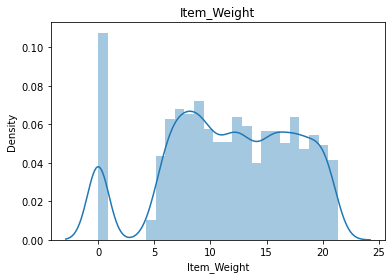

C:\Users\mercy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


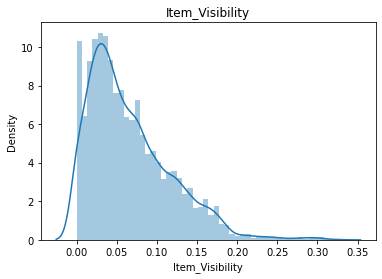

C:\Users\mercy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


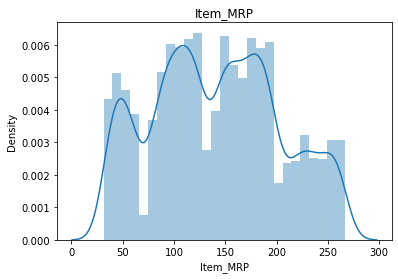

C:\Users\mercy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


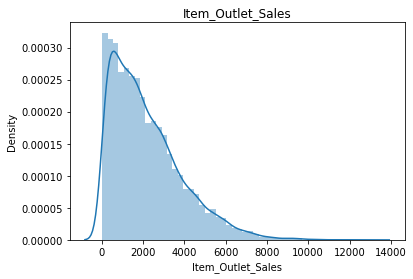

C:\Users\mercy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


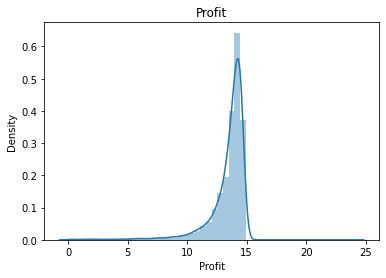

In [129]:
# distplot
for col in num_data:
    sns.distplot(num_data[col])
    plt.title(col)
    plt.show()

In [130]:
num_data.skew() 
# item weight and mrp are normally distributted based on skewness

Item_Weight         -0.352215
Item_Visibility      1.167091
Item_MRP             0.127390
Item_Outlet_Sales    1.177531
Profit              -3.379808
dtype: float64

In [10]:
# Square root transformation to achieve normality
sq = np.sqrt(num_data['Item_Outlet_Sales']).skew()
sq

0.23467599347099247

<AxesSubplot:ylabel='Density'>

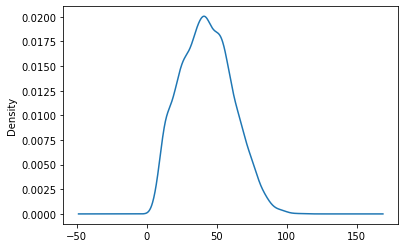

In [134]:
np.sqrt(num_data['Item_Outlet_Sales']).plot(kind='kde')

# Probability 

In [3]:
cric_df = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/crick.csv') 
print(cric_df.shape)
cric_df.head()

(3932, 7)


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [4]:
# missing values
cric_df.isna().sum()

Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64

In [5]:
# drop missing values
cric_df=cric_df.dropna()
cric_df.shape

(3753, 7)

**India batted first** (is_india_bat_first column with values 1,0)
  * ind won by 5 runs => winner=India and Margin contains 'run'
         OR
  * opponent team won by 4 wickets => winner!=India and Margin contains 'wicket'
  
---

**Matches India batted first** => sum of is_india_bat_first column values

**Matches India batted first and Won** => Matches India batted first and winner = India

**Probability India Won Given India Batted First** = Matches India batted first and Won / Matches India batted = 51%

---

**Matches India batted last** => Matches played by India - Matches India Batted First

**Matches India batted last and Won** => Matches India batted last and winner = India 

**Probability India Won Given India Batted Last** = Matches India batted last and Won / Matches India batted last = 57%

**Probability India Wins** = Total Matches India Won / Total Matches Played By India = 54%

---

**Observation**

Probability of India winning the Match is higher when India bats last.

In [48]:
# total matches india won
matches_ind_won = cric_df[cric_df.Winner=='India'].shape[0]

# total matches india played
matches_ind_played_df = cric_df[(cric_df['Team 1']=='India')|(cric_df['Team 2']=='India')].copy()
matches_ind_played = matches_ind_played_df.shape[0]

# total matches india batted first
is_ind_bat_first = lambda winner,margin: 1 if (winner=='India' and 'run' in margin) or ((winner!='India') and 'wicket' in margin) else 0
matches_ind_played_df['is_ind_bat_first'] = matches_ind_played_df.apply(lambda x: is_ind_bat_first(x.Winner, x.Margin), axis=1)
matches_ind_bat_first = matches_ind_played_df.is_ind_bat_first.sum()

# total matches India Batted first and won
matches_ind_bat_first_win = matches_ind_played_df[(matches_ind_played_df.is_ind_bat_first==1)&(matches_ind_bat_first_df.Winner=='India')].shape[0]


# total matches india batted last
matches_ind_bat_last = matches_ind_played_df.shape[0]-matches_ind_bat_first

# total matches India Batted last and won
matches_ind_bat_last_win = matches_ind_played_df[(matches_ind_played_df.is_ind_bat_first==0) & (matches_ind_played_df.Winner=='India')].shape[0]

ind_win_prob = round(matches_ind_won/matches_ind_played*100)
ind_bat_first_win_prob = round(matches_ind_bat_first_win/matches_ind_bat_first*100)
ind_bat_last_win_prob = round(matches_ind_bat_last_win/matches_ind_bat_last*100)

print("India Winning Probability = {}%".format(ind_win_prob))
print("India Winning Probility given India batted first = {}%".format(ind_bat_first_win_prob))
print("India Winning Probility given India batted last = {}%".format(ind_bat_last_win_prob))

India Winning Probability = 54%
India Winning Probility given India batted first = 51%
India Winning Probility given India batted last = 57%
